<a href="https://colab.research.google.com/github/jdmartinezrs/K-NN_MODEL_KM_VEHICLE_PREDICTION/blob/main/VotingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
# Cargar datos desde Google Drive
sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'
df = pd.read_csv(sheet_url)

In [4]:

# Limpiar y renombrar columnas
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Km/ Hr Plan': 'Km_Plan',
    'Ult Km/Hr': 'Ult_Km',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Progreso': 'Progreso',
    'Km/Hr Pend': 'Km_Pend'
})

# Definir características y variable objetivo
features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso', 'Tipo_Vehiculo']
target = 'Km_Pend'

In [5]:
# Separar X e y
X = df[features]
y = df[target]

In [6]:
# Definir tipos de columnas
numerical_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesamiento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [7]:
# Crear modelo de K-NN
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

# Entrenar modelo
model.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Ult_Km', 'Km_Plan',
                                                   'Km_Cambio', 'Dias_Pend',
                                                   'Progreso']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Tipo_Vehiculo'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=3))])

Escribe el número correspondiente al tipo de vehículo:
1. CARROTANQUE
2. DOBLETROQUE
3. TRACTOCAMION
4. GRUA
5. IRRIGADOR
Tu opción (1-5): 1
Ingrese la cantidad de kilómetros recorridos: 1010

El vehículo tipo 'CARROTANQUE' tiene aproximadamente 5923.08 Km restantes antes del próximo mantenimiento.


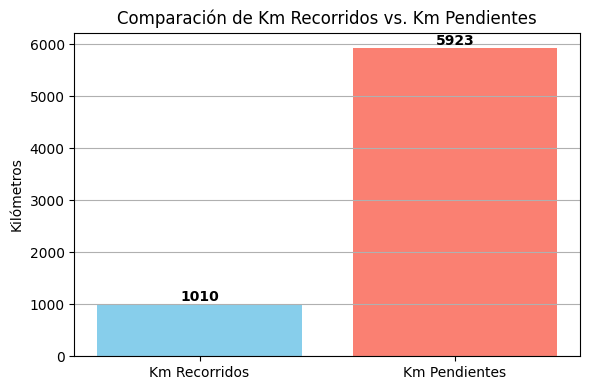

In [28]:

# Lista de tipos de vehículos
tipos_vehiculo = ['CARROTANQUE', 'DOBLETROQUE', 'TRACTOCAMION', 'GRUA', 'IRRIGADOR']

# Mostrar opciones
print("Escribe el número correspondiente al tipo de vehículo:")
for i, tipo in enumerate(tipos_vehiculo, start=1):
    print(f"{i}. {tipo}")

# Solicitar opción
while True:
    opcion = input("Tu opción (1-5): ")
    if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
        tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
        break
    else:
        print("Por favor, ingresa un número válido entre 1 y 5.")

# Pedir kilómetros recorridos
while True:
    try:
        km_recorridos = float(input("Ingrese la cantidad de kilómetros recorridos: "))
        break
    except ValueError:
        print("Por favor, ingrese un número válido para los kilómetros.")

# Preparar datos para predicción
input_data = pd.DataFrame([{
    'Ult_Km': km_recorridos,
    'Km_Plan': df['Km_Plan'].mean(),
    'Km_Cambio': df['Km_Cambio'].mean(),
    'Dias_Pend': df['Dias_Pend'].mean(),
    'Progreso': df['Progreso'].mean(),
    'Tipo_Vehiculo': tipo_vehiculo
}])

# Realizar predicción
pred = model.predict(input_data)[0]
print(f"\nEl vehículo tipo '{tipo_vehiculo}' tiene aproximadamente {pred:.2f} Km restantes antes del próximo mantenimiento.")

# Visualización de la predicción
labels = ['Km Recorridos', 'Km Pendientes']
values = [km_recorridos, pred]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

# Crear modelos individuales
knn = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

lr = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# VotingRegressor (promedio de ambos)
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn),
    ('lr', lr)
])





In [14]:

# Entrenar
ensemble_model.fit(X, y)

VotingRegressor(estimators=[('knn',
                             Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ult_Km',
                                                                                'Km_Plan',
                                                                                'Km_Cambio',
                                                                                'Dias_Pend',
                                                                                'Progreso']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Tipo_Vehiculo'])])),
                                             ('regressor',
                                              K...))])),
                            ('lr',
                             Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ult_Km',
                                                                                'Km_Plan',
                                                                                'Km_Cambio',
                                                                                'Dias_Pend',
                                                                                'Progreso']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Tipo_Vehiculo'])])),
                                             ('regressor',
                                              LinearRegression())]))])

In [39]:
# Predecir
pred_final = ensemble_model.predict(input_data)[0]

print(f"\n[Ensemble] Km restantes antes del próximo mantenimiento: {pred_final:.2f} Km")


[Ensemble] Km restantes antes del próximo mantenimiento: 5560.75 Km


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


In [17]:
# Crear modelo combinado (KNN + Regresión Lineal)
regressor_knn = KNeighborsRegressor(n_neighbors=3)
regressor_lr = LinearRegression()

combined_model = VotingRegressor([
    ('knn', regressor_knn),
    ('lr', regressor_lr)
])

# Pipeline final
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', combined_model)
])


In [40]:
# Lista de tipos de vehículos
tipos_vehiculo = ['CARROTANQUE', 'DOBLETROQUE', 'TRACTOCAMION', 'GRUA', 'IRRIGADOR']

print("Escribe el número correspondiente al tipo de vehículo:")
for i, tipo in enumerate(tipos_vehiculo, start=1):
    print(f"{i}. {tipo}")

while True:
    opcion = input("Tu opción (1-5): ")
    if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
        tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
        break
    else:
        print("Por favor, ingresa un número válido entre 1 y 5.")

while True:
    try:
        km_recorridos = float(input("Ingrese la cantidad de kilómetros recorridos: "))
        break
    except ValueError:
        print("Por favor, ingrese un número válido para los kilómetros.")

input_data = pd.DataFrame([{
    'Ult_Km': km_recorridos,
    'Km_Plan': df['Km_Plan'].mean(),
    'Km_Cambio': df['Km_Cambio'].mean(),
    'Dias_Pend': df['Dias_Pend'].mean(),
    'Progreso': df['Progreso'].mean(),
    'Tipo_Vehiculo': tipo_vehiculo
}])

# Realizar predicción
pred = model.predict(input_data)[0]
print(f"\nEl vehículo tipo '{tipo_vehiculo}' tiene aproximadamente {pred:.2f} Km restantes antes del próximo mantenimiento.")

# Visualización
labels = ['Km Recorridos', 'Km Pendientes']
values = [km_recorridos, pred]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Escribe el número correspondiente al tipo de vehículo:
1. CARROTANQUE
2. DOBLETROQUE
3. TRACTOCAMION
4. GRUA
5. IRRIGADOR
Tu opción (1-5): 1
Ingrese la cantidad de kilómetros recorridos: 58


ValueError: columns are missing: {'fecha_prox_cambio', 'fecha_revision', 'fecha_cambio', 'fecha_ult_pre_operacional'}

Escribe el número correspondiente al tipo de vehículo:
1. CARROTANQUE
2. DOBLETROQUE
3. TRACTOCAMION
4. GRUA
5. IRRIGADOR
Tu opción (1-5): 1
Ingrese la cantidad de kilómetros recorridos: 1010

El vehículo tipo 'CARROTANQUE' tiene aproximadamente 5923.08 Km restantes antes del próximo mantenimiento.


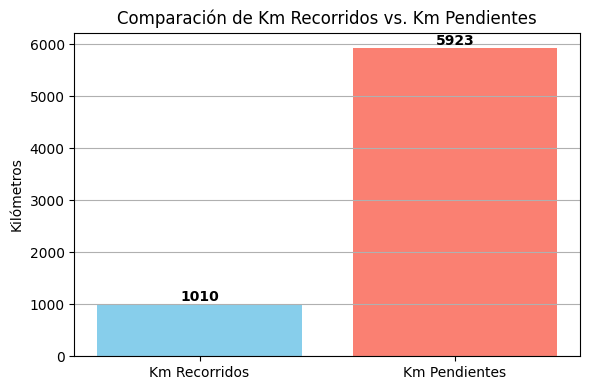

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.exceptions import NotFittedError

# Simula tu DataFrame df si no lo tienes (solo para ejemplo)
# df = pd.read_csv("tu_archivo.csv")  # Usa esto si ya tienes los datos

# Lista de tipos de vehículos
tipos_vehiculo = ['CARROTANQUE', 'DOBLETROQUE', 'TRACTOCAMION', 'GRUA', 'IRRIGADOR']

# Mostrar opciones al usuario
print("Escribe el número correspondiente al tipo de vehículo:")
for i, tipo in enumerate(tipos_vehiculo, start=1):
    print(f"{i}. {tipo}")

# Leer opción válida
while True:
    opcion = input("Tu opción (1-5): ")
    if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
        tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
        break
    else:
        print("Por favor, ingresa un número válido entre 1 y 5.")

# Leer kilómetros recorridos
while True:
    try:
        km_recorridos = float(input("Ingrese la cantidad de kilómetros recorridos: "))
        break
    except ValueError:
        print("Por favor, ingrese un número válido para los kilómetros.")

# Columnas numéricas y categóricas
numeric_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesamiento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Modelos base
model1 = ('lr', LinearRegression())
model2 = ('knn', KNeighborsRegressor(n_neighbors=3))

# Modelo combinado
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor(estimators=[model1, model2]))
])

# Entrenamiento
X = df[numeric_features + categorical_features]
y = df['Km_Pend']  # Asegúrate de que esta columna exista
model.fit(X, y)

# Preparar input del usuario
input_data = pd.DataFrame([{
    'Ult_Km': km_recorridos,
    'Km_Plan': df['Km_Plan'].mean(),
    'Km_Cambio': df['Km_Cambio'].mean(),
    'Dias_Pend': df['Dias_Pend'].mean(),
    'Progreso': df['Progreso'].mean(),
    'Tipo_Vehiculo': tipo_vehiculo
}])

# Predicción
pred = model.predict(input_data)[0]
print(f"\nEl vehículo tipo '{tipo_vehiculo}' tiene aproximadamente {pred:.2f} Km restantes antes del próximo mantenimiento.")

# Visualización
labels = ['Km Recorridos', 'Km Pendientes']
values = [km_recorridos, pred]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [26]:
model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Ult_Km', 'Km_Plan',
                                                   'Km_Cambio', 'Dias_Pend',
                                                   'Progreso']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Tipo_Vehiculo'])])),
                ('regressor',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('knn',
                                              KNeighborsRegressor(n_neighbors=3))]))])

In [29]:
# Obtener predicciones individuales de los modelos
X_transformed = model.named_steps['preprocessor'].transform(input_data)

pred_lr = model.named_steps['regressor'].estimators_[0].predict(X_transformed)[0]
pred_knn = model.named_steps['regressor'].estimators_[1].predict(X_transformed)[0]
pred_voting = model.predict(input_data)[0]

print(f"\n📈 Predicción de Linear Regression: {pred_lr:.2f}")
print(f"📊 Predicción de KNN: {pred_knn:.2f}")
print(f"🧮 Predicción final del VotingRegressor (promedio): {pred_voting:.2f}")



📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 6392.67
🧮 Predicción final del VotingRegressor (promedio): 5923.08


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 5
Ingrese los kilómetros recorridos (Ult_Km): 255

Predicción: Km pendientes ~ 5027.41
Linear Regression: 5453.49
KNN: 4601.33
VotingRegressor promedio: 5027.41


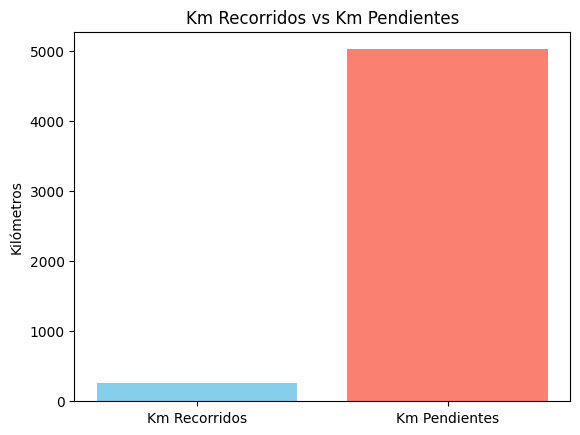

In [42]:
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Km/ Hr Plan': 'Km_Plan',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend',
    'fecha de revision': 'fecha_revision',
    'Fecha Ult Pre-Operacional': 'fecha_ult_pre_operacional',
    'Fecha Cambio': 'fecha_cambio',
    'Fecha Prox Cambio': 'fecha_prox_cambio'
}, inplace=True)

# Convertir fechas a datetime
fecha_cols = ['Fecha', 'fecha_revision', 'fecha_ult_pre_operacional', 'fecha_cambio', 'fecha_prox_cambio']
for col in fecha_cols:
    df[col] = pd.to_datetime(df[col])

# Crear un transformer para extraer características de fechas relativas
class DateDiffTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ref_date_col, date_cols):
        self.ref_date_col = ref_date_col
        self.date_cols = date_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        ref_date = pd.to_datetime(X_[self.ref_date_col])
        diffs = pd.DataFrame()
        for col in self.date_cols:
            date_col = pd.to_datetime(X_[col])
            diffs[col + '_diff'] = (ref_date - date_col).dt.days
        return diffs.values

# Columnas de fechas que vamos a convertir a diferencias en días con respecto a 'fecha_revision'
date_diff_cols = ['fecha_ult_pre_operacional', 'fecha_cambio', 'fecha_prox_cambio']

# Variables numéricas y categóricas
numeric_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']
date_features = date_diff_cols  # estas serán procesadas por DateDiffTransformer

# Preprocesador que combina procesamiento numérico, categórico y fechas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('date_diff', DateDiffTransformer(ref_date_col='fecha_revision', date_cols=date_diff_cols), date_diff_cols + ['fecha_revision'])
])

# Modelos base
model1 = ('lr', LinearRegression())
model2 = ('knn', KNeighborsRegressor(n_neighbors=3))

# Pipeline completo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor(estimators=[model1, model2]))
])

# Construir X y y
# Importante: para DateDiffTransformer debe recibir las columnas que utiliza (las fechas),
# por eso las incluimos explícitamente en X.
X = df[numeric_features + categorical_features + date_diff_cols + ['fecha_revision']]
y = df['Km_Pend']

# Entrenar modelo
model.fit(X, y)

# Interfaz sencilla para predecir
tipos_vehiculo = df['Tipo_Vehiculo'].unique().tolist()
print("Elige el tipo de vehículo:")
for i, tipo in enumerate(tipos_vehiculo, start=1):
    print(f"{i}. {tipo}")

while True:
    opcion = input(f"Tu opción (1-{len(tipos_vehiculo)}): ")
    if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
        tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
        break
    else:
        print("Opción inválida.")

while True:
    try:
        km_recorridos = float(input("Ingrese los kilómetros recorridos (Ult_Km): "))
        break
    except ValueError:
        print("Ingresa un número válido.")

# Para las fechas de entrada, para simplificar, usamos las medias de días para las diferencias
fecha_revision = pd.Timestamp.now()

input_data = pd.DataFrame([{
    'Ult_Km': km_recorridos,
    'Km_Plan': df['Km_Plan'].mean(),
    'Km_Cambio': df['Km_Cambio'].mean(),
    'Dias_Pend': df['Dias_Pend'].mean(),
    'Progreso': df['Progreso'].mean(),
    'Tipo_Vehiculo': tipo_vehiculo,
    'fecha_ult_pre_operacional': fecha_revision - pd.Timedelta(days=int(df['fecha_ult_pre_operacional'].sub(df['fecha_revision']).dt.days.mean())),
    'fecha_cambio': fecha_revision - pd.Timedelta(days=int(df['fecha_cambio'].sub(df['fecha_revision']).dt.days.mean())),
    'fecha_prox_cambio': fecha_revision + pd.Timedelta(days=int(df['fecha_prox_cambio'].sub(df['fecha_revision']).dt.days.mean())),
    'fecha_revision': fecha_revision
}])

# Predecir
pred = model.predict(input_data)[0]
print(f"\nPredicción: Km pendientes ~ {pred:.2f}")

# Opcional: predicciones individuales de los modelos
X_transformed = model.named_steps['preprocessor'].transform(input_data)
pred_lr = model.named_steps['regressor'].estimators_[0].predict(X_transformed)[0]
pred_knn = model.named_steps['regressor'].estimators_[1].predict(X_transformed)[0]

print(f"Linear Regression: {pred_lr:.2f}")
print(f"KNN: {pred_knn:.2f}")
print(f"VotingRegressor promedio: {pred:.2f}")

# Visualización sencilla
plt.bar(['Km Recorridos', 'Km Pendientes'], [km_recorridos, pred], color=['skyblue', 'salmon'])
plt.title('Km Recorridos vs Km Pendientes')
plt.ylabel('Kilómetros')
plt.show()

In [43]:
# Obtener predicciones individuales de los modelos
X_transformed = model.named_steps['preprocessor'].transform(input_data)

pred_lr = model.named_steps['regressor'].estimators_[0].predict(X_transformed)[0]
pred_knn = model.named_steps['regressor'].estimators_[1].predict(X_transformed)[0]
pred_voting = model.predict(input_data)[0]

print(f"\n📈 Predicción de Linear Regression: {pred_lr:.2f}")
print(f"📊 Predicción de KNN: {pred_knn:.2f}")
print(f"🧮 Predicción final del VotingRegressor (promedio): {pred_voting:.2f}")



📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 4601.33
🧮 Predicción final del VotingRegressor (promedio): 5027.41



--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES ---

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 5
Ingrese los kilómetros recorridos (Ult_Km): 6474

📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 4133.67
🧮 Predicción final del VotingRegressor (promedio): 4793.58

¿Deseas hacer otra predicción? (s/n): s

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 2
Ingrese los kilómetros recorridos (Ult_Km): 6474

📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 6227.00
🧮 Predicción final del VotingRegressor (promedio): 5840.25

¿Deseas hacer otra predicción? (s/n): s

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 1
Ingrese los kilómetros recorridos (Ult_Km): 6474

📈 Predicción de Linear Regression: 5453.49
📊 Predicción 

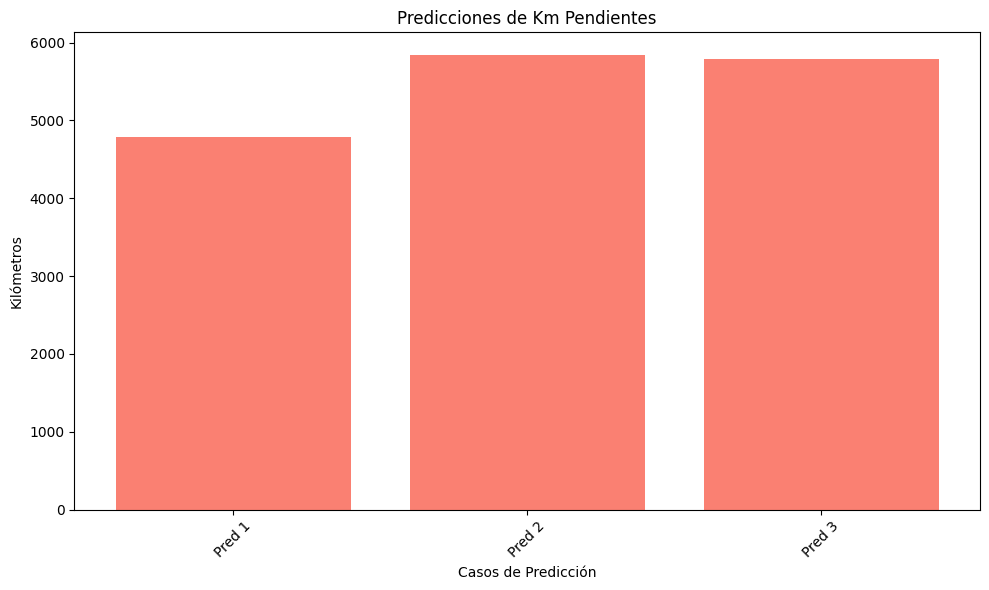

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cargar datos
# df = pd.read_csv('tu_archivo.csv')

# Renombrar columnas para evitar espacios y caracteres especiales
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Km/ Hr Plan': 'Km_Plan',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend'
}, inplace=True)

# Variables numéricas y categóricas
numeric_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Modelos base
model1 = ('lr', LinearRegression())
model2 = ('knn', KNeighborsRegressor(n_neighbors=3))

# Pipeline completo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor(estimators=[model1, model2]))
])

# Separar datos para entrenamiento
X = df[numeric_features + categorical_features]
y = df['Km_Pend']

# Entrenar modelo
model.fit(X, y)

# Lista para guardar predicciones
resultados = []

print("\n--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES ---")

while True:
    # Selección de tipo de vehículo
    tipos_vehiculo = df['Tipo_Vehiculo'].unique().tolist()
    print("\nElige el tipo de vehículo:")
    for i, tipo in enumerate(tipos_vehiculo, start=1):
        print(f"{i}. {tipo}")
    while True:
        opcion = input(f"Tu opción (1-{len(tipos_vehiculo)}): ")
        if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
            tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
            break
        else:
            print("Opción inválida.")

    # Ingreso de Km recorridos
    while True:
        try:
            km_recorridos = float(input("Ingrese los kilómetros recorridos (Ult_Km): "))
            break
        except ValueError:
            print("Ingresa un número válido.")

    # Crear DataFrame de entrada con valores promedio
    input_data = pd.DataFrame([{
        'Ult_Km': km_recorridos,
        'Km_Plan': df['Km_Plan'].mean(),
        'Km_Cambio': df['Km_Cambio'].mean(),
        'Dias_Pend': df['Dias_Pend'].mean(),
        'Progreso': df['Progreso'].mean(),
        'Tipo_Vehiculo': tipo_vehiculo
    }])

    # Predecir
    pred = model.predict(input_data)[0]

    # Transformar entrada para predicciones individuales
    X_transformed = model.named_steps['preprocessor'].transform(input_data)
    pred_lr = model.named_steps['regressor'].estimators_[0].predict(X_transformed)[0]
    pred_knn = model.named_steps['regressor'].estimators_[1].predict(X_transformed)[0]

    # Mostrar resultados
    print(f"\n📈 Predicción de Linear Regression: {pred_lr:.2f}")
    print(f"📊 Predicción de KNN: {pred_knn:.2f}")
    print(f"🧮 Predicción final del VotingRegressor (promedio): {pred:.2f}")

    # Guardar resultados
    resultados.append({
        'Ult_Km': km_recorridos,
        'Tipo_Vehiculo': tipo_vehiculo,
        'Linear Regression': pred_lr,
        'KNN': pred_knn,
        'VotingRegressor': pred
    })

    # ¿Desea continuar?
    continuar = input("\n¿Deseas hacer otra predicción? (s/n): ").strip().lower()
    if continuar != 's':
        break

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla resumen
print("\n--- RESUMEN DE PREDICCIONES ---")
print(df_resultados)

# Visualización de todas las predicciones
plt.figure(figsize=(10, 6))
for i, row in df_resultados.iterrows():
    plt.bar(f'Pred {i+1}', row['VotingRegressor'], color='salmon')
plt.title('Predicciones de Km Pendientes')
plt.ylabel('Kilómetros')
plt.xlabel('Casos de Predicción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES PARA REALIZAR EL PROXIMO MANTENIMIENTO ---

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 1
Ingrese los kilómetros recorridos (Ult_Km): 65

📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 6116.67
🧮 Predicción final del VotingRegressor (promedio): 5785.08

¿Deseas hacer otra predicción? (s/n): s

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 5
Ingrese los kilómetros recorridos (Ult_Km): 6545

📈 Predicción de Linear Regression: 5453.49
📊 Predicción de KNN: 4133.67
🧮 Predicción final del VotingRegressor (promedio): 4793.58

¿Deseas hacer otra predicción? (s/n): n

--- RESUMEN DE PREDICCIONES ---
   Ult_Km Tipo_Vehiculo  Linear Regression          KNN  VotingRegressor
0    65.0     IRRIGADOR           5453.494  6116.666667      5785.080333
1  6545.0  CARRO TANQUE 

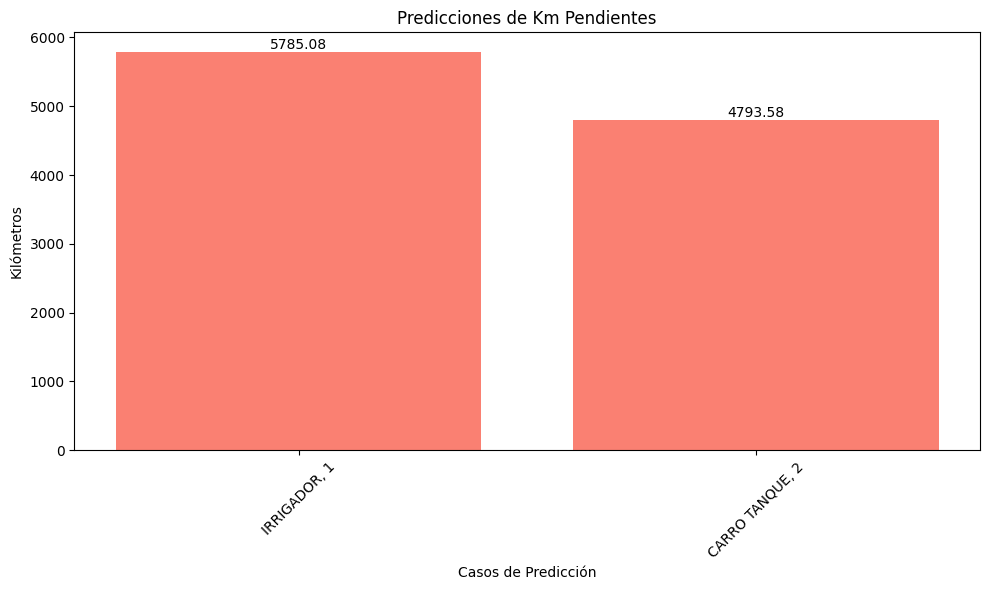

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cargar datos
# df = pd.read_csv('tu_archivo.csv')

# Renombrar columnas para evitar espacios y caracteres especiales
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Km/ Hr Plan': 'Km_Plan',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend'
}, inplace=True)

# Variables numéricas y categóricas
numeric_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Modelos base
model1 = ('lr', LinearRegression())
model2 = ('knn', KNeighborsRegressor(n_neighbors=3))

# Pipeline completo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor(estimators=[model1, model2]))
])

# Separar datos para entrenamiento
X = df[numeric_features + categorical_features]
y = df['Km_Pend']

# Entrenar modelo
model.fit(X, y)

# Lista para guardar predicciones
resultados = []

print("\n--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES PARA REALIZAR EL PROXIMO MANTENIMIENTO ---")

while True:
    # Selección de tipo de vehículo
    tipos_vehiculo = df['Tipo_Vehiculo'].unique().tolist()
    print("\nElige el tipo de vehículo:")
    for i, tipo in enumerate(tipos_vehiculo, start=1):
        print(f"{i}. {tipo}")
    while True:
        opcion = input(f"Tu opción (1-{len(tipos_vehiculo)}): ")
        if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
            tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
            break
        else:
            print("Opción inválida.")

    # Ingreso de Km recorridos
    while True:
        try:
            km_recorridos = float(input("Ingrese los kilómetros recorridos (Ult_Km): "))
            break
        except ValueError:
            print("Ingresa un número válido.")

    # Crear DataFrame de entrada con valores promedio
    input_data = pd.DataFrame([{
        'Ult_Km': km_recorridos,
        'Km_Plan': df['Km_Plan'].mean(),
        'Km_Cambio': df['Km_Cambio'].mean(),
        'Dias_Pend': df['Dias_Pend'].mean(),
        'Progreso': df['Progreso'].mean(),
        'Tipo_Vehiculo': tipo_vehiculo
    }])

    # Predecir
    pred = model.predict(input_data)[0]

    # Transformar entrada para predicciones individuales
    X_transformed = model.named_steps['preprocessor'].transform(input_data)
    pred_lr = model.named_steps['regressor'].estimators_[0].predict(X_transformed)[0]
    pred_knn = model.named_steps['regressor'].estimators_[1].predict(X_transformed)[0]

    # Mostrar resultados
    print(f"\n📈 Predicción de Linear Regression: {pred_lr:.2f}")
    print(f"📊 Predicción de KNN: {pred_knn:.2f}")
    print(f"🧮 Predicción final del VotingRegressor (promedio): {pred:.2f}")

    # Guardar resultados
    resultados.append({
        'Ult_Km': km_recorridos,
        'Tipo_Vehiculo': tipo_vehiculo,
        'Linear Regression': pred_lr,
        'KNN': pred_knn,
        'VotingRegressor': pred
    })

    # ¿Desea continuar?
    continuar = input("\n¿Deseas hacer otra predicción? (s/n): ").strip().lower()
    if continuar != 's':

        break

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla resumen
print("\n--- RESUMEN DE PREDICCIONES ---")
print(df_resultados)

# Visualización de todas las predicciones con valores encima de cada barra
plt.figure(figsize=(10, 6))
for i, row in df_resultados.iterrows():
    etiqueta = f"{row['Tipo_Vehiculo']}, {i+1}"
    valor = row['VotingRegressor']
    plt.bar(etiqueta, valor, color='salmon')
    plt.text(etiqueta, valor + 0.5, f"{valor:.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.title('Predicciones de Km Pendientes')
plt.ylabel('Kilómetros')
plt.xlabel('Casos de Predicción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
